In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [8]:
### Linear Regression Model
w, b = 0.7, 0.3

X = torch.arange(start = 0, end = 1, step = 0.02).unsqueeze(dim = 1)
y = w * X + b

In [7]:
### Splitting Data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

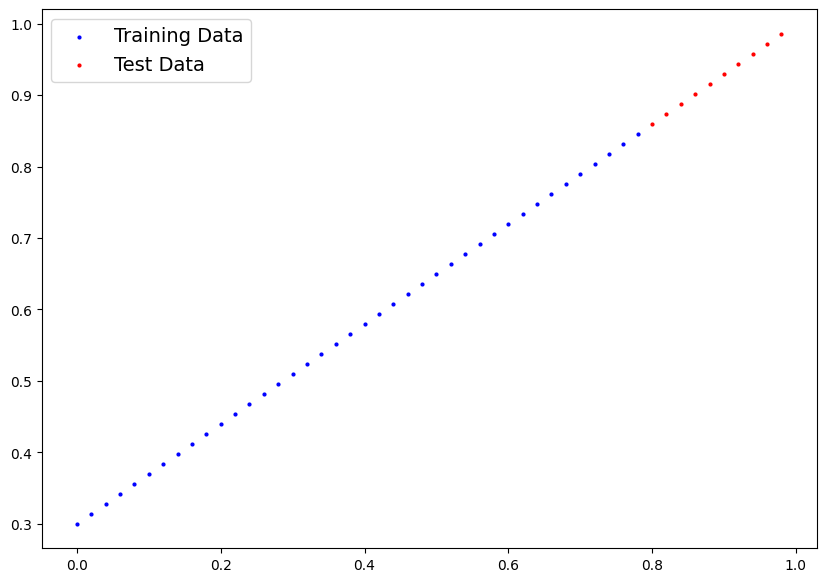

In [19]:
### Plotting
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    ### Plotting
    plt.figure(figsize = (10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training Data")

    # Plot test data in red
    plt.scatter(test_data, test_labels, c = "r", s = 4, label = "Test Data")

    if predictions is not None:
        # Plot predictions in green
        plt.scatter(test_data, predictions, c = "g", s = 4, label = "Predictions")

    plt.legend(prop = {'size': 14})

plot_predictions()

In [12]:
### Building a Linear Regression Model

# Subclass nn.Module: Contains all building blocks for neural networks
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # requires_grad = True: Track the gradients of this specific parameter for use with torch.autograd and gradient descent
        self.w = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))
        self.b = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))

    # Any subclass of nn.Moduel requires forward(), which defines the computation that will take place on the data
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.w * x + self.b

In [14]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

# Check the nn.Parameters within nn.Module
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
# Check the named parameters
model_0.state_dict()

OrderedDict([('w', tensor([-0.6495])), ('b', tensor([-0.8230]))])

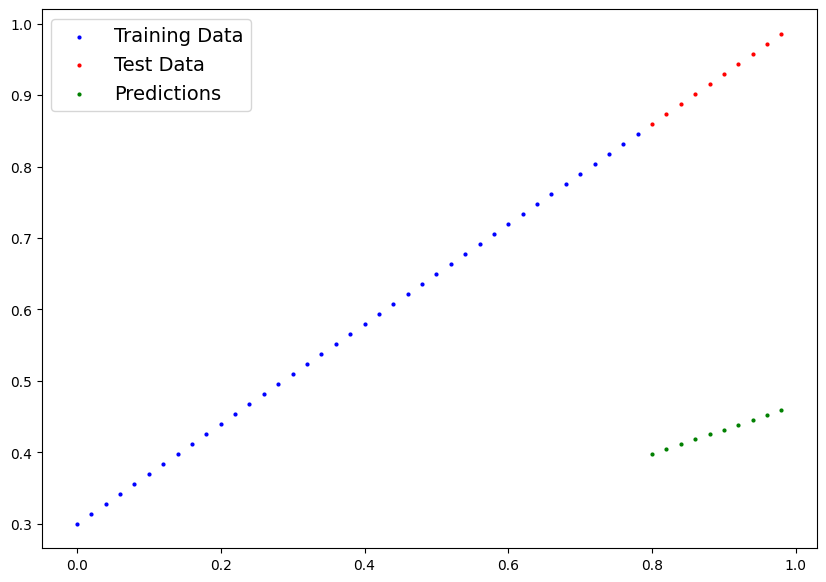

In [20]:
### Make Predictions

### Use torch.inference_mode() when inferencing. This will also turns of gradient checking for faster forward-passes
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions = y_preds)

In [22]:
### Defining Loss Function and Optimizer
loss_function = nn.L1Loss() # MAE

# params: Which parameters of the model to optimized?
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [30]:
torch.manual_seed(42)

epochs = 100

# Tracking
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put the model in training mode (Default state of a model)
    model_0.train()

    # Forward-pass
    y_pred = model_0(X_train)

    # Calculate the loss
    loss = loss_function(y_pred, y_train)

    # The optimizer will accumulate the gradients every epochs, zero to refresh
    optimizer.zero_grad()

    # Calculate gradients of every parameter with require_grads = True
    loss.backward()

    # Updates model's parameters
    optimizer.step()


    ### Testing

    # Put the model in evaluation mode (This also turns off functionality used in training but not in evaluation)
    model_0.eval()

    with torch.inference_mode():
        # Forward-pass
        test_pred = model_0(X_test)

        # Calculate the loss (Test set)
        test_loss = loss_function(test_pred, y_test.type(torch.float))

        # Displaying updates
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 10 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 20 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 30 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 40 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 50 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 60 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 


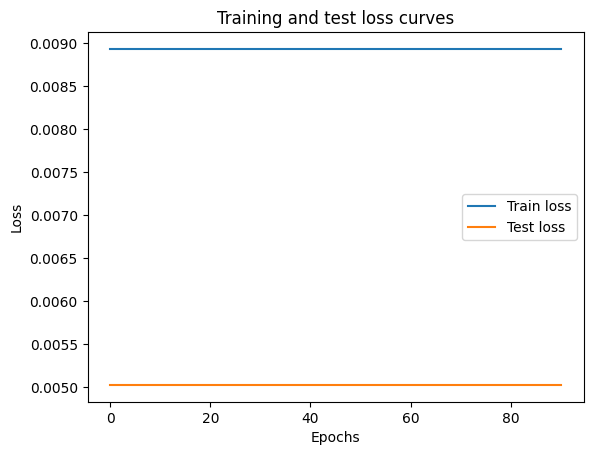

In [31]:
### Plotting the loss curves
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [35]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {w}, bias: {b}")

The model learned the following values for weights and bias:
OrderedDict([('w', tensor([0.6990])), ('b', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


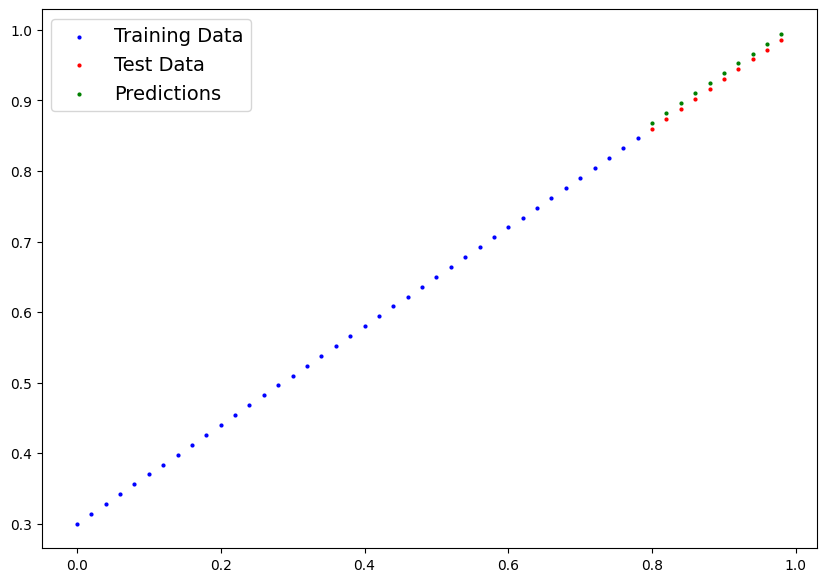

In [34]:
model_0.eval()

with torch.inference_mode():
    # Make sure the calculations are done with the model and data on the same device
    # in our case, we haven't setup device-agnostic code yet so our data and model are
    # on the CPU by default.
    # model_0.to(device)
    # X_test = X_test.to(device)
    y_preds = model_0(X_test)

plot_predictions(predictions = y_preds)

In [38]:
### Saving Model

from pathlib import Path

# 1. Create models directory for saving models using Python's pathlib module.
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

### Note: We're just storing parameters instead of the entire model (Why? -> Google)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [39]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Jan 29 09:51 models/01_pytorch_workflow_model_0.pth


In [40]:
### Loading Model

# Instantiate a new instance of our model
loaded_model_0 = LinearRegressionModel()

# torch.load: Loads the state dict
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<ipython-input-40-2831b3f6be47>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

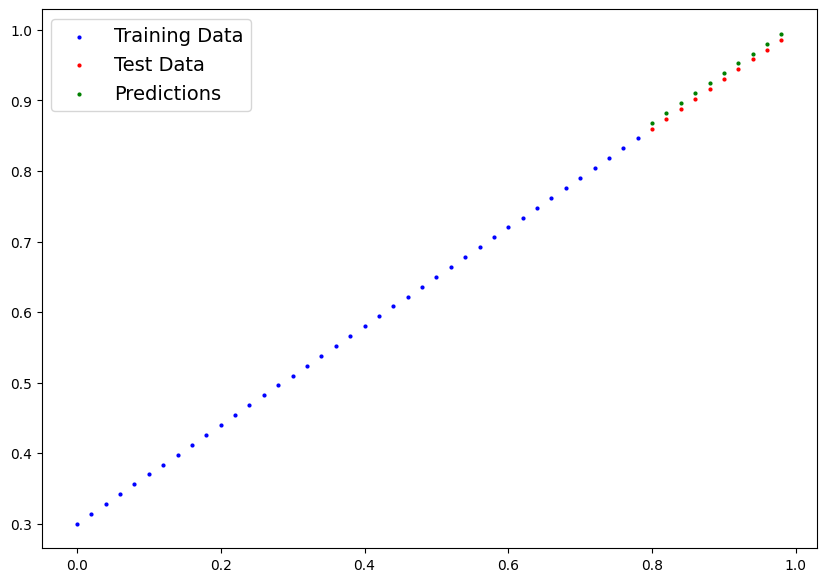

In [41]:
### Testing Loaded Model

loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

plot_predictions(predictions = loaded_model_preds)